#### Create object with mean flow and wave structure and compute ray tracing

Equations ...


In [1]:
import numpy as np
import xarray as xr
import scipy.integrate
import matplotlib.pyplot as plt

In [4]:
def dispersion(k, c=None,**kwargs):
    omega = c*np.sqrt(k[0]**2+k[1]**2)
    domegadk = (k[0]*c**2/omega,k[1]*c**2/omega)
    domegadx = (0,0)
    return omega,domegadk,domegadx
def flow(t,x,y,R=None,psi_0=None,x_c=None,y_c=None,**kwargs):
    exp = psi_0*np.exp(-((x-x_c)**2+(y-y_c)**2)/R**2)
    u = 2*(y-y_c)/R**2*exp
    v = -2*(x-x_c)/R**2*exp
    dudx = -2*(x-x_c)/R**2*u
    dudy = -2*(y-y_c)/R**2*u+2/R**2*exp#(-4*(y-y_0)*(x-x_0)/(R**4)+y/R**2)*exp
    dvdx = -2*(x-x_c)/R**2*v-2/R**2*exp
    dvdy = -2*(y-y_c)/R**2*v
    return (u,v), (dudx,dudy,dvdx,dvdy)

In [5]:
def f(X,t,flow,dispersion,params):
    x,y,k,l = X
    U,gradU = flow(t,x,y,**params)
    omega,domegadk,domegadx = dispersion((k,l),**params)
    dx = U[0]+domegadk[0]
    dy = U[1]+domegadk[1]
    dkx = -gradU[0]*k-gradU[2]*l-domegadx[0]
    dky = -gradU[1]*k-gradU[3]*l-domegadx[1]
    return [dx,dy,dkx,dky]

In [6]:
R = 50000
params = {'psi_0':1e4,'R':R,'c':1,'x_c':0,'y_c':0}

In [7]:
ds = xr.Dataset(None,coords={'x':('x',np.arange(-5*R,5*R,R/100)),'y':('y',np.arange(-5*R,5*R,R/100))})

In [8]:
(ds["u"], ds["v"]), (ds["dudx"], ds["dudy"],ds["dvdx"], ds["dvdy"]) = flow(0, ds.x, ds.y,**params)
ds = ds.transpose("y","x")

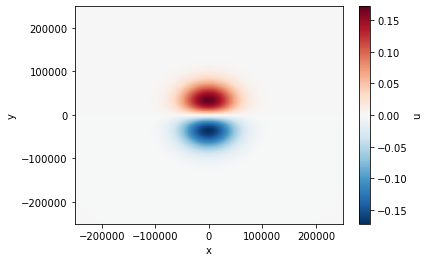

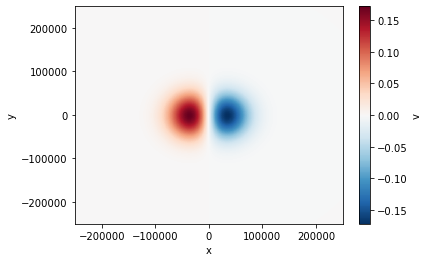

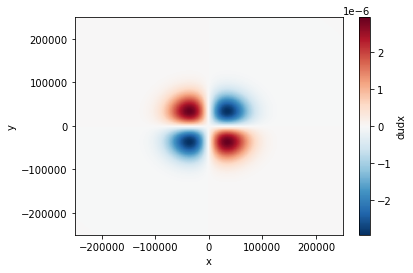

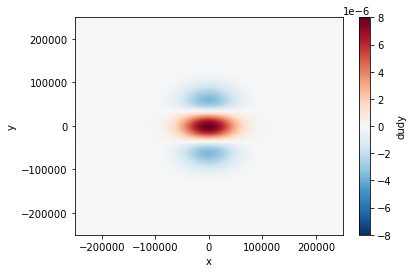

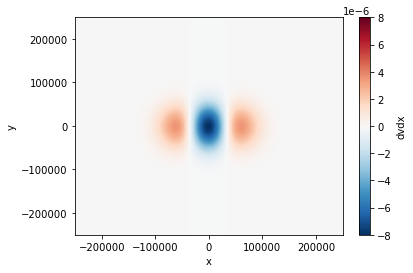

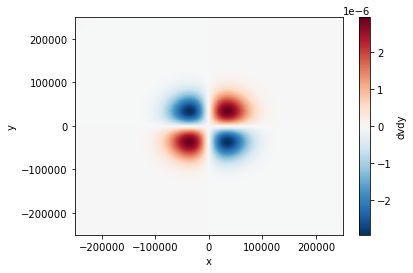

In [9]:
for _v in ["u", "v", "dudx", "dudy", "dvdx", "dvdy"]:
    fig, ax = plt.subplots(1,1)
    ds[_v].plot(ax=ax)

In [19]:
x_0,y_0 = -R/5,-2*R
k_0, l_0 = 0, 1/5e3

ds["time"] = ("time", np.arange(0,10,1/24))
r = scipy.integrate.odeint(f,[x_0,y_0,k_0,l_0], ds["time"].values*86400,(flow,dispersion,params))
for i, _v in enumerate(["x_ray", "y_ray", "k", "l"]):
    ds[_v] = ("time", r[:,i])
    
(ds["omega_hat"], (ds["domegadk"], ds["domegadl"]), _) = dispersion((ds.k, ds.l), **params)
ds["u_ray"] = ds["u"].interp(x=ds["x_ray"], y=ds["y_ray"])
ds["v_ray"] = ds["v"].interp(x=ds["x_ray"], y=ds["y_ray"])
ds["omega"] = ds["u_ray"]*ds["k"] + ds["v_ray"]*ds["l"] + ds["omega_hat"]
ds["kappa"] = np.sqrt(ds["k"]**2+ds["l"]**2)

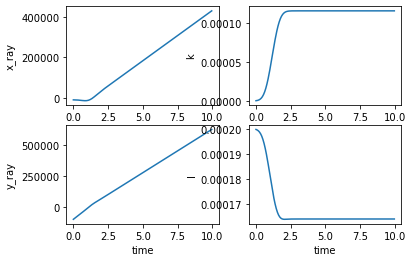

In [20]:
fig, axes = plt.subplots(2,2)
ax = axes[0, 0]
ds["x_ray"].plot(ax=ax)
ax = axes[1, 0]
ds["y_ray"].plot(ax=ax)
ax = axes[0, 1]
ds["k"].plot(ax=ax)
ax = axes[1, 1]
ds["l"].plot(ax=ax)

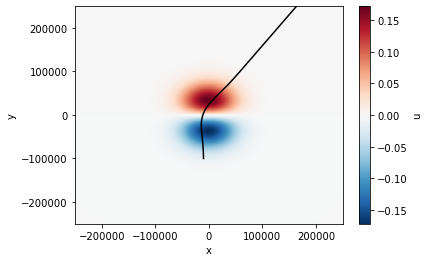

In [21]:
fig, ax = plt.subplots(1,1)
ds["u"].plot(ax=ax)
ax.plot(ds["x_ray"], ds["y_ray"], 'k')

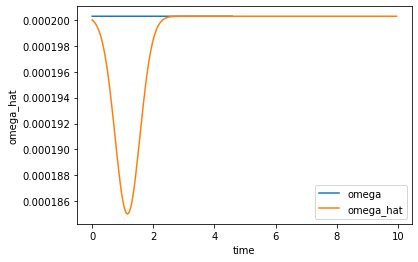

In [22]:
ds["omega"].plot(label="omega")
ds["omega_hat"].plot(label="omega_hat")
plt.legend()

In [14]:
ds["omega_hat"].mean()

<xarray.DataArray 'omega_hat' ()>
array(0.0002)

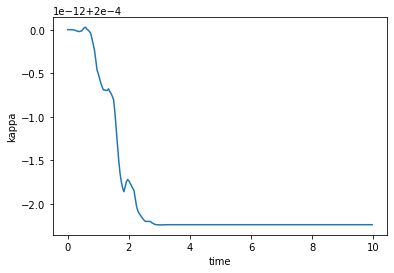

In [15]:
ds["kappa"].plot()

In [ ]:
class ray_tracing(object):

    def __init__(self, flow, dispersion):
        """ 
        
        Parameters
        ----------
        flow: dict
            Flow parameters
        dispersion: dict
            Wave dispersion parameters
        """
        # init flow and dispersion functions
        # self.flow = self._flow_gaussian_eddy
        # build ds
        
    #def _flow_gaussian_eddy(self, ...)
        
    def run(self, x, y, k, l):
        """ 
        
        Parameters
        ----------
        x, y: arrays
            List of initial positions
        k, l: arrays
            List of initial wavenumbers
            
        Returns
        -------
        output dataset with ray trajectories and relevant variables
        
        """
        
#
##    def initialize(self,te):
#            self.t=np.arange(self.t_i, self.t_f, self.t_step)
#            self.x=np.arange(self.x_i,self.x_e,self.x_step)
#            len_t=len(self.t)
#            len_x=len(self.x)
        
        #self.VF=np.zeros((len_t, len_x))
        #for i in range(len_t):
        #    for j in range (len_x):
        #        self.VF[i,j]=self.velocity_func(self.t[i], self.x[j], self.um, self.uw, self.w, self.k)
    

In [ ]:
def intialize(self,t_i,t_e,dt,dx,dy):
    self.x = np.arange(0,100,dx)
    self.y = np.arange(0,100,dy)
    self.t = np.arange(t_i,t_e,dt)
    return self